# 二次元配列と勾配問題
機械学習においては関数の最小値を見つけることが重要になってきます。そのために使われるのが勾配降下法です。


この課題では勾配降下法を理解する準備として、NumPyを用いて関数の勾配を考えていきます。

## 【問題1】1次関数
xが-50から50の範囲で次の式を考えます。

$$y=\frac{1}{2}x+1$$

-50から50まで0.1間隔のxを表すndarrayと、各要素に対するyを表すndarrayを作成してください。

In [1]:
import numpy as np
#-50から50まで0.1間隔のxを表すndarray
x_ndarray = np.arange(-50, 50.1, 0.1)
y_ndarray = (1/2) * x_ndarray + 1
print(x_ndarray)
print(y_ndarray)

[-50.  -49.9 -49.8 ...  49.8  49.9  50. ]
[-24.   -23.95 -23.9  ...  25.9   25.95  26.  ]


## 【問題2】配列の結合
問題1で作成したndarrayを結合し、(1001, 2)の形の配列にしてください。0列目にx、1列目にyが来るようにします。

In [2]:
import numpy as np
#-50から50まで0.1間隔のxを表すndarray
x_ndarray = np.arange(-50, 50+0.1, 0.1)
y_ndarray = (1/2) * x_ndarray + 1 

x1_ndarray = x_ndarray.reshape(-1, 1)#xの配列
y1_ndarray = y_ndarray.reshape(1001,1)#yの配列

mix_ndarray = np.concatenate([x1_ndarray,y1_ndarray],axis=1)
print(mix_ndarray.shape)
print(mix_ndarray)

(1001, 2)
[[-50.   -24.  ]
 [-49.9  -23.95]
 [-49.8  -23.9 ]
 ...
 [ 49.8   25.9 ]
 [ 49.9   25.95]
 [ 50.    26.  ]]


### 別回答


In [3]:
mix1_ndarray = np.hstack((x_ndarray.reshape(1001,1), y_ndarray.reshape(1001,1)))
print(mix1_ndarray.shape)
print(mix1_ndarray)

(1001, 2)
[[-50.   -24.  ]
 [-49.9  -23.95]
 [-49.8  -23.9 ]
 ...
 [ 49.8   25.9 ]
 [ 49.9   25.95]
 [ 50.    26.  ]]


## 【問題3】勾配を求める
各x座標における勾配を求めます。ここで勾配はyの変化量をxの変化量で割ることで計算します。

$$勾配 = \frac{yの変化量}{xの変化量}$$
各変化量は以下の図のように隣同士の要素の差から近似的に求めます。

ある配列がある==>スライスする==>差を計算する==>変化量を得る

厳密に各点における勾配を求めるには極限（微分）を利用する必要があります
勾配はx座標の間隔を使うので、xの要素数に対して一つ少なくなります


In [21]:
n_ndarray = mix_ndarray[1:,:] - mix_ndarray[:-1,:] 
gradient = n_ndarray[:,1] / n_ndarray[:,0]#yの変化量をxの変化量で割る
print(gradient[0:5]) #先頭の５つで確認
print(gradient.shape)

[0.5 0.5 0.5 0.5 0.5]
(1000,)


## 【問題4】グラフを描く
1次関数のグラフをMatplotlibを用いて描いてください。また、それとは別に横軸をx、縦軸を勾配としたグラフも描いてください。

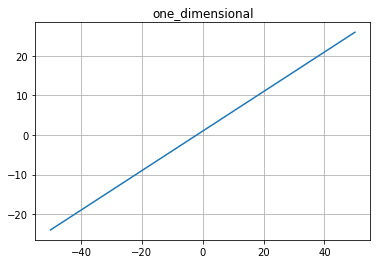

In [5]:
import matplotlib.pyplot as plt
plt.title("one_dimensional")
plt.plot(x_ndarray,y_ndarray)
plt.grid()
plt.show()

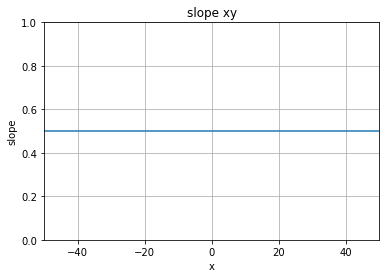

In [6]:
import numpy as np
import matplotlib.pyplot as plt
gradient = n_ndarray[:,1] / n_ndarray[:,0]

plt.title("slope xy")
plt.xlabel("x")
plt.ylabel("slope")
plt.plot(x_ndarray[:-1],gradient)
plt.xlim(-50, 50)
plt.ylim(0,1)
plt.grid()
plt.show()


## 【問題5】Pythonの関数化
問題1から問題3までの範囲をまとめて行うPythonの関数を雛形を参考に作成してください。


そして、以下の3式の勾配を0.1間隔で求めてndarrayで出力してください。


$$y = x^{2} \quad (-50\leq x \leq 50)\\ y = 2x^{2}+2^{x} \quad (-50\leq x \leq 50)\\ y = sin(x^{\frac{1}{2}}) \quad (0\leq x \leq 50)$$
また、問題4と同様にグラフを描いてください。


ndarrayに対して三角関数のsinの計算を行うには np.sin()を用います。

In [7]:
#問題１：-50から50まで0.1間隔のxを表すndarrayと、各要素に対するyを表すndarrayを作成してください：
#問題２:問題1で作成したndarrayを結合し、(1001, 2)の形の配列にしてください。0列目にx、1列目にyが来るようにします。
#問題３：各x座標における勾配を求めます。ここで勾配はyの変化量をxの変化量で割ることで計算します：

#ｘ間　0.1
#y間   0.05
#a(変化量)間 0.5

In [8]:
def compute_gradient(function, x_range=(-50, 50.1, 0.1)):
    """
    変化量を使い勾配を計算する。
    Parameters
    ----------------
    function : function
      求めたい関数、xのndarrayを入れるとyのndarrayを返すもの。
    x_range : tuple
      np.arange()の引数と同じ方法で範囲を指定する。
    Returns
    ----------------
    array_xy : ndarray, shape(n, 2)
      xとyを結合したもの。nはx_rangeに依存する。
    gradient : ndarray, shape(n-1,)
      関数の勾配。差をとるため要素は1つ減る
    """ 
    x = np.arange(*x_range) #xの範囲
    x1 = x.reshape(len(x),1) #x縦変換
    y1 = function(x1) #xをyに代入(function:引数)
    x1_d = x1[1:] - x1[:-1] #xの変化量(x間の差)
    y1_d = y1[1:] - y1[:-1] #yの変化量(y間の差)
    array_xy = np.hstack((x1, y1))#x:1列目　y:2列目
    gradient = y1_d / x1_d # a:(yの変化量をxの変化量で割る)
    
    
    return array_xy, gradient, y1

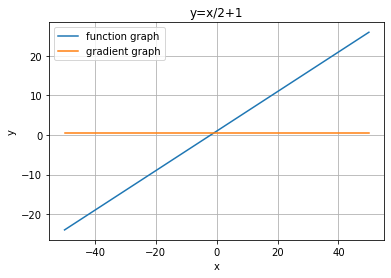

In [9]:
#一次関数
def function0(array_x):
   
    return array_x/2 + 1


array_xy0, gradient, y0 = compute_gradient(function0)

import matplotlib.pyplot as plt
plt.title("y=x/2+1")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(array_xy0[:,0], array_xy0[:,1], label="function graph")
plt.plot(array_xy0[:-1,0], gradient[:,0], label="gradient graph")
plt.legend()
plt.grid()
plt.show()

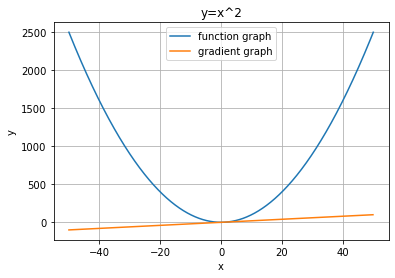

In [10]:
# 二次関数
def function1(array_x):
   
    return array_x**2


array_xy0, gradient, y0 = compute_gradient(function1)

import matplotlib.pyplot as plt
plt.title("y=x^2")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(array_xy0[:,0], array_xy0[:,1], label="function graph")
plt.plot(array_xy0[:-1,0], gradient[:,0], label="gradient graph")
plt.legend()
plt.grid()
plt.show()

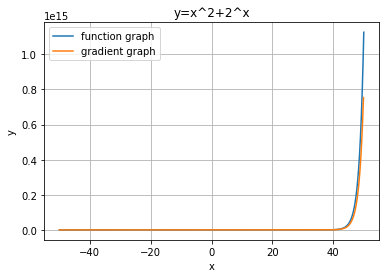

In [11]:
#二次関数
def function2(array_x):
   
    return 2*(array_x**2)+(2**array_x)


array_xy0, gradient, y0 = compute_gradient(function2)

import matplotlib.pyplot as plt
plt.title("y=x^2+2^x")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(array_xy0[:,0], array_xy0[:,1], label="function graph")
plt.plot(array_xy0[:-1,0], gradient[:,0], label="gradient graph")
plt.legend()
plt.grid()
plt.show()

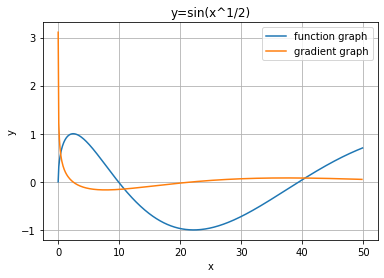

In [12]:
#三角関数(sin)
def function3(array_x):
   
    return np.sin(array_x**(1/2))


array_xy0, gradient, y0 = compute_gradient(function3,(0,50,0.1))

import matplotlib.pyplot as plt
plt.title("y=sin(x^1/2)")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(array_xy0[:,0], array_xy0[:,1], label="function graph")
plt.plot(array_xy0[:-1,0], gradient[:,0], label="gradient graph")
plt.legend()
plt.grid()
plt.show()

## 【問題6】最小値を求める
問題5で扱った関数のyの最小値を求めます。xの範囲も問題5と同様とします。


今回は勾配降下法ではなく、ndarrayのminメソッド、argminメソッドを用いてください。minメソッドは最小値を、argminメソッドは最小値のインデックスを取得することができます。


また、最小のyをとる前後の勾配を表示してください。

In [13]:
#y = x/2 + 1
s_min0, xi0, yj0 = compute_gradient(function0)
print(np.min(yj0))
print(np.argmin(yj0))
print(xi0[0:2])

-24.0
0
[[0.5]
 [0.5]]


In [14]:
#y = x^2  
s_min1, xi1, yj1 = compute_gradient(function1)
print(np.min(yj1))
print(np.argmin(yj1))
print(xi1[499:502])

5.048709793414476e-25
500
[[-0.1]
 [ 0.1]
 [ 0.3]]


In [15]:
#y = 2*x^2+2^x
s_min2, xi2, yj2 = compute_gradient(function2)
print(np.min(yj2))
print(np.argmin(yj2))
print(xi2[497:500])

0.9505505632959851
498
[[-0.41701833]
 [ 0.02482428]
 [ 0.46967008]]


In [16]:
#y = sin(x^1/2)
s_min3, xi3, yj3 = compute_gradient(function3,(0,50,0.1))
print(np.min(yj3))
print(np.argmin(yj3))
print(xi3[221:224])

-0.9999997540298113
222
[[-0.00063884]
 [ 0.00048745]
 [ 0.00160612]]
